In [1]:
#Exercise 10.2 Build your own CCN Image Classifier
#DSC-550
#Dan Clayton

In [2]:
#Import some important libraries
from sklearn import preprocessing
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf

In [3]:
#1) Load the MNIST data set.
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


5


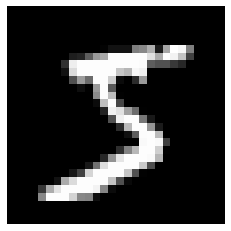

0


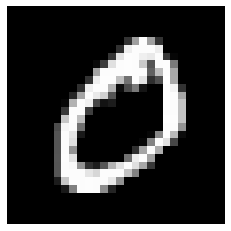

4


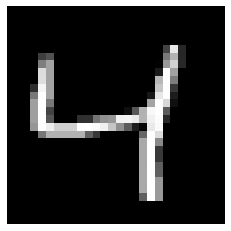

1


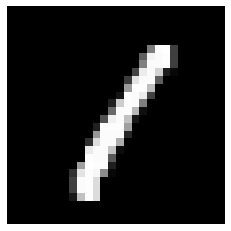

'\nfor i in range(0,4):\n    plt.imshow(Y_train[i], cmap="gray"), plt.axis("off")\n    plt.show()\n'

In [4]:
#2) Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). 
#Compare these to the first five training labels.

for i in range(0,4):
    plt.imshow(X_train[i], cmap="gray"), plt.axis("off")
    print(y_train[i])
    plt.show()



'''
for i in range(0,4):
    plt.imshow(Y_train[i], cmap="gray"), plt.axis("off")
    plt.show()
'''

In [5]:
#3) Build and train a Keras CNN classifier on the MNIST training set.

#Create feature--features already exist (they are the image matrices)

#Normalize the features
features_train = tf.keras.utils.normalize(X_train, axis=1)
features_test = tf.keras.utils.normalize(X_test, axis=1)

#Add layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape =(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

#Train the model
model.fit(features_train, y_train, epochs=3)

#Save the model
model.save('first_knn')

Epoch 1/3
1875/1875 [==============================] - 2s 846us/step - loss: 0.2623 - accuracy: 0.9235
Epoch 2/3
1875/1875 [==============================] - 2s 809us/step - loss: 0.1078 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 1s 792us/step - loss: 0.0723 - accuracy: 0.9768
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: first_knn\assets


In [6]:
#4) Report the test accuracy of your model.
loss, accuracy = model.evaluate(features_test, y_test)
print(f'Model accuracy: {accuracy}')

313/313 [==============================] - 0s 598us/step - loss: 0.0860 - accuracy: 0.9718
Model accuracy: 0.9718000292778015


In [11]:
#5) Display a confusion matrix on the test set classifications.

from sklearn import metrics as skm

predicts = model.predict(features_test)
from numpy import argmax

#Calculations to feed to the confusion matrix
y_predicted = model.predict(X_test, verbose = 0)
y_pred = np.argmax(y_predicted, axis = 1)

 
#Build the actual confusion matrix
confus_mat = skm.confusion_matrix(y_test, y_pred)

#Display the confusion matrix
confus_mat

array([[ 967,    1,    0,    0,    1,    0,    5,    1,    3,    2],
       [   0, 1129,    0,    1,    0,    0,    1,    1,    3,    0],
       [   7,   24,  935,    6,    6,    2,    6,   31,   12,    3],
       [   0,    7,    2,  963,    1,    5,    0,    9,   13,   10],
       [   0,   18,    0,    0,  912,    0,    9,    2,    1,   40],
       [   3,   16,    1,   14,    0,  821,   14,    3,   13,    7],
       [   6,    5,    0,    1,    5,    1,  936,    0,    4,    0],
       [   0,   21,    1,    0,    0,    0,    0,  998,    1,    7],
       [   5,   21,    0,    2,    2,    1,    4,    0,  937,    2],
       [   2,   11,    0,    3,   10,    2,    1,    6,    9,  965]],
      dtype=int64)

In [7]:
#6) Summarize your results.
#The neural network did a great job predicting what the hand-written characters were (> 96& accurate)
#While the model could have been trained with more iterations, and perhaps gained a slightly higher accuracy, 
#this could very possibly have led to overfitting, which would be undesirable in practical application


